In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from abi.misc.dataset import Dataset
from abi.misc.utils import load_data
from abi.models.rnnvae import RNNVAE

In [3]:
data = load_data(
    filepath='../../data/trajectories/artificial.h5',
    debug_size=20000
)
obs = data['obs']
act = data['act']
lengths = data['lengths']
y = data['y']
obs_keys = data['obs_keys']
act_keys = data['act_keys']
max_len = data['max_len']
obs_dim = data['obs_dim']
act_dim = data['act_dim']
val_obs, val_act, val_lengths, val_y = data['val_obs'], data['val_act'], data['val_lengths'], data['val_y']

In [5]:
batch_size = 100
dataset = Dataset(np.copy(obs), np.copy(act), np.copy(lengths), batch_size, shuffle=True)

In [6]:
z_dim = 2

tf.reset_default_graph()
sess = tf.InteractiveSession()
model = RNNVAE(
    max_len, 
    obs_dim, 
    act_dim, 
    batch_size, 
    z_dim=z_dim, 
    enc_hidden_dim=16,
    dec_hidden_dim=16,
    kl_steps=1000
)
sess.run(tf.global_variables_initializer())

In [7]:
model.train(dataset, n_epochs=10, verbose=True)

train epoch: 5 / 10 batch: 11 / 160 data_loss: 1.21727  kl_loss: 0.20000 

KeyboardInterrupt: 

In [8]:
max_samples = 1000
info = model.reconstruct(obs[:max_samples], act[:max_samples], lengths[:max_samples])

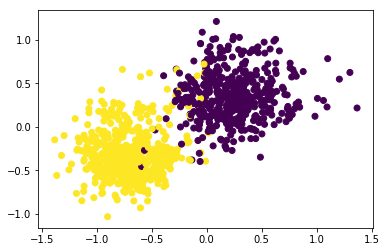

In [9]:
plt.scatter(info['mean'][:,0], info['mean'][:,1], c=y[:max_samples])

In [10]:
info = model.reconstruct(val_obs[:max_samples], val_act[:max_samples], val_lengths[:max_samples])

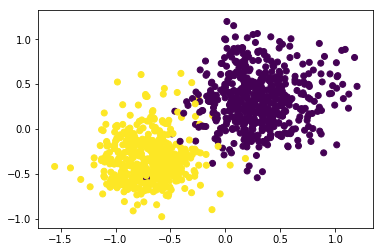

In [11]:
plt.scatter(info['mean'][:,0], info['mean'][:,1], c=val_y[:max_samples])